<a href="https://colab.research.google.com/github/Prakharprasun/FMA/blob/main/FMAQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate the cost of equity capital – Top down approach

By: PRAKHAR PRASUN 2023A4PS1289H

In [145]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [146]:
axis_df = yf.download('AXISBANK.NS', start='2019-01-01', end='2024-01-01',progress=False, interval='1mo')
axis_df.head()

Price,Close,High,Low,Open,Volume
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
Date,,,,,
2019-01-01,718.672241,722.799076,600.285746,618.434035,278878127
2019-02-01,705.595581,730.406544,676.906390,716.733174,205349203
2019-03-01,772.918274,783.260338,695.651295,709.523562,185271775
2019-04-01,762.576233,778.636251,734.235067,776.597688,136945660
2019-05-01,803.795227,817.518306,712.109057,762.576221,172097329


In [147]:
nifty_df = yf.download('^BSESN', start='2019-01-01', end='2024-01-01',progress=False, interval='1mo')
nifty_df.head()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2019-01-01,36256.691406,36701.031250,35375.511719,36198.128906,133470600
2019-02-01,35867.441406,37172.179688,35287.160156,36311.738281,60134300
2019-03-01,38672.910156,38748.539062,35926.941406,36018.488281,318000
2019-04-01,39031.550781,39487.449219,38460.250000,38858.878906,312900
2019-05-01,39714.199219,40124.960938,36956.101562,39036.511719,396100


In [148]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Close']/nifty_df['Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2019-01-01         NaN
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-12-01    0.078420
2021-01-01   -0.031172
2021-02-01    0.059024
2021-03-01    0.008299
2021-04-01   -0.014789
2021-05-01    0.062671
2021-06-01    0.010444
2021-07-01    0.001982
2021-08-01    0.090230
2021-09-01    0.026981
2021-10-01    0.003049
2021-11-01   -0.038537
2021-12-01    0.020621
2022-01-01   -0.004122
2022-02-01   -0.030930
2022-03-01    0.040440
2022-04-01   -0.026079
2022-05-01   -0.026540
2022-06-01   -0.046930
2022-07-01    0.082357
2022-0

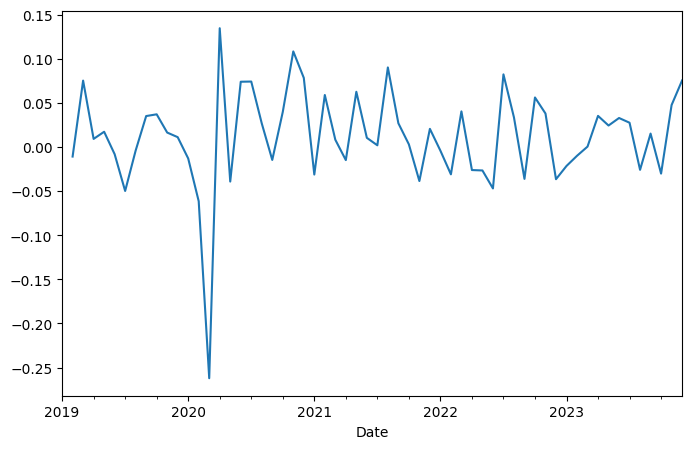

In [149]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

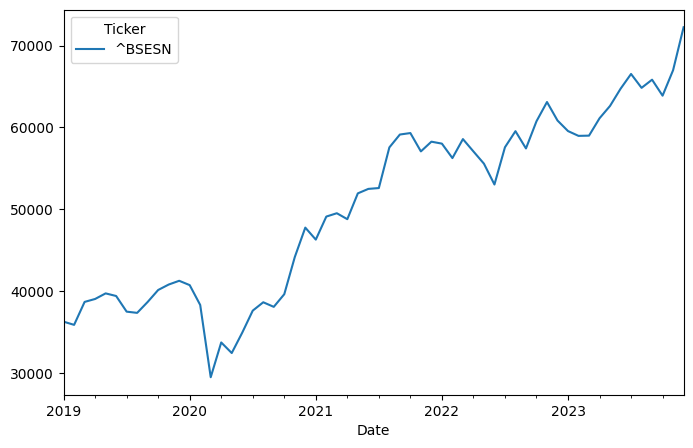

In [150]:
nifty_df['Close'].plot(figsize=(8,5))
plt.show()

In [151]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

Price,Close,High,Low,Open,Volume,Return_NIFTY
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,
Date,,,,,,
2019-02-01,35867.441406,37172.179688,35287.160156,36311.738281,60134300,-0.010794
2019-03-01,38672.910156,38748.539062,35926.941406,36018.488281,318000,0.075309
2019-04-01,39031.550781,39487.449219,38460.250000,38858.878906,312900,0.009231
2019-05-01,39714.199219,40124.960938,36956.101562,39036.511719,396100,0.017338
2019-06-01,39394.640625,40312.070312,38870.960938,39806.859375,311500,-0.008079


In [152]:
#Caclulate log returns
axis_df['Return_AXIS'] = np.log(axis_df['Close']/axis_df['Close'].shift(1))
print(axis_df['Return_AXIS'])

Date
2019-01-01         NaN
2019-02-01   -0.018363
2019-03-01    0.091131
2019-04-01   -0.013471
2019-05-01    0.052642
2019-06-01    0.000309
2019-07-01   -0.181864
2019-08-01   -0.014006
2019-09-01    0.031287
2019-10-01    0.072287
2019-11-01    0.003660
2019-12-01    0.020159
2020-01-01   -0.033440
2020-02-01   -0.044869
2020-03-01   -0.609679
2020-04-01    0.160313
2020-05-01   -0.144736
2020-06-01    0.054839
2020-07-01    0.059662
2020-08-01    0.140472
2020-09-01   -0.156822
2020-10-01    0.148229
2020-11-01    0.200098
2020-12-01    0.030852
2021-01-01    0.066179
2021-02-01    0.089272
2021-03-01   -0.038465
2021-04-01    0.024712
2021-05-01    0.048863
2021-06-01   -0.003202
2021-07-01   -0.054089
2021-08-01    0.103878
2021-09-01   -0.025693
2021-10-01   -0.032551
2021-11-01   -0.123722
2021-12-01    0.034331
2022-01-01    0.130386
2022-02-01   -0.040456
2022-03-01    0.024942
2022-04-01   -0.043706
2022-05-01   -0.061414
2022-06-01   -0.073255
2022-07-01    0.129371
2022-0

In [153]:
axis_df1 = axis_df.dropna(axis=0)
axis_df1.head()

Price,Close,High,Low,Open,Volume,Return_AXIS
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,
Date,,,,,,
2019-02-01,705.595581,730.406544,676.906390,716.733174,205349203,-0.018363
2019-03-01,772.918274,783.260338,695.651295,709.523562,185271775,0.091131
2019-04-01,762.576233,778.636251,734.235067,776.597688,136945660,-0.013471
2019-05-01,803.795227,817.518306,712.109057,762.576221,172097329,0.052642
2019-06-01,804.043762,823.136769,752.333570,809.015896,169586920,0.000309


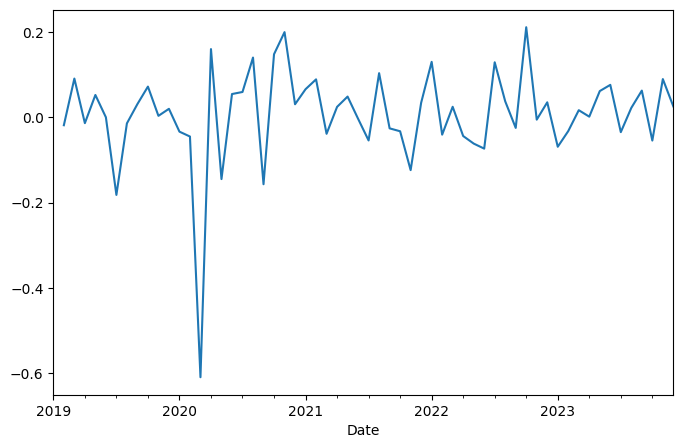

In [154]:
axis_df['Return_AXIS'].plot(figsize=(8,5))
plt.show()

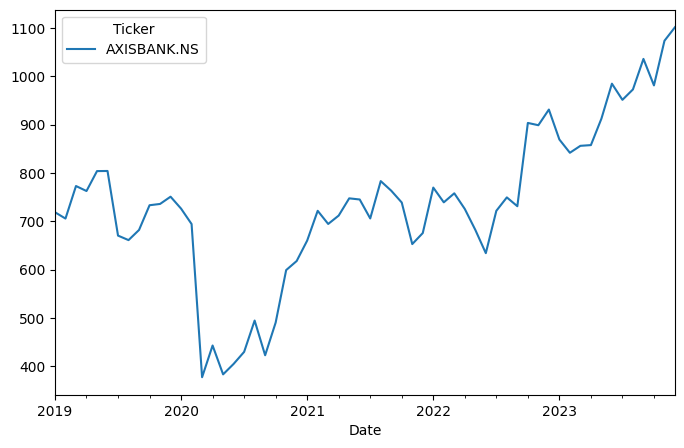

In [155]:
axis_df['Close'].plot(figsize=(8,5))
plt.show()

In [156]:
axis_df1_returns = axis_df1['Return_AXIS']
axis_df1_returns.head()

,Return_AXIS
Date,
2019-02-01,-0.018363
2019-03-01,0.091131
2019-04-01,-0.013471
2019-05-01,0.052642
2019-06-01,0.000309


In [157]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

,Return_NIFTY
Date,
2019-02-01,-0.010794
2019-03-01,0.075309
2019-04-01,0.009231
2019-05-01,0.017338
2019-06-01,-0.008079


In [158]:
returns = pd.merge(nifty_df1_returns,axis_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_AXIS
count,59.000000,59.000000
mean,0.011684,0.007237
std,0.056066,0.114525
min,-0.262058,-0.609679
25%,-0.018117,-0.034003
50%,0.011211,0.020159
75%,0.038908,0.062364
max,0.134699,0.211621


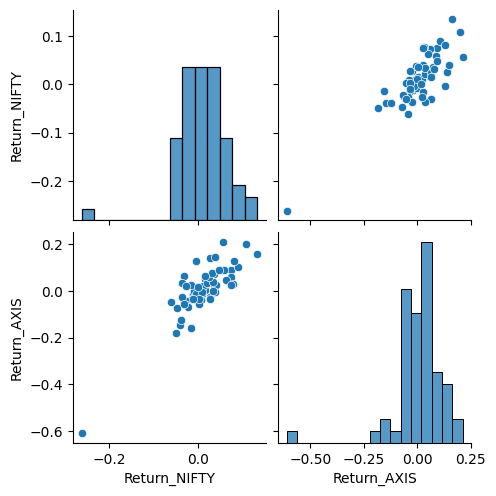

In [159]:
sns.pairplot(returns)
plt.show()

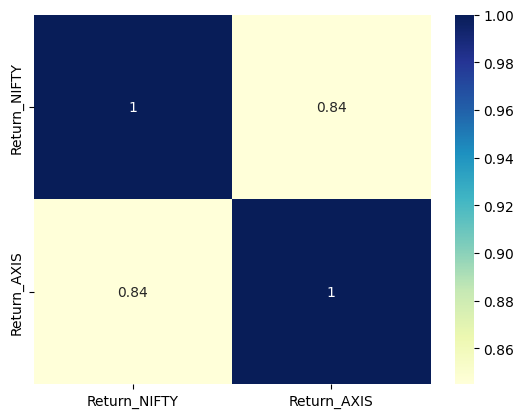

In [160]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [161]:
x = returns['Return_NIFTY']
y = returns['Return_AXIS']
x_sm = sm.add_constant(x)

# Assumptions of OLS regression
A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters

The independent variables are not highly correlated with each other - no multicollinearity

The variance of the residuals is constant - no heteroskedasticity
Random sampling of observation and no autocorrelation
Assumption of Normality of Errors

## Ri = αi + βi(RM) + εi.........Market model

* Ri = Return of security

* αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

* βi = Beta or the return from the security explained by the market index’s return

* RM = The market index’s return

* εi = Error term for past returns not explained by the regression equation

In [162]:
#Regression - Market model
model = sm.OLS(y,x_sm)

In [163]:
results = model.fit()

In [164]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_AXIS   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           4.06e-17
Time:                        17:20:07   Log-Likelihood:                 81.542
No. Observations:                  59   AIC:                            -159.1
Df Residuals:                      57   BIC:                            -154.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0129      0.008     -1.572      0.121      -0.029       0.004
Return_NIFTY     1.7258      0.145     11.922      0.000       1.436       2.016
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.886
Skew:                           0.295   Prob(JB):                        0.642
Kurtosis:                       3.108   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Beta for Infosys stock = 1.7170, Beta is highly statistically significant

In [165]:
beta = 1.7170

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-02-01 to 2023-12-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_AXIS   59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_AXIS'>

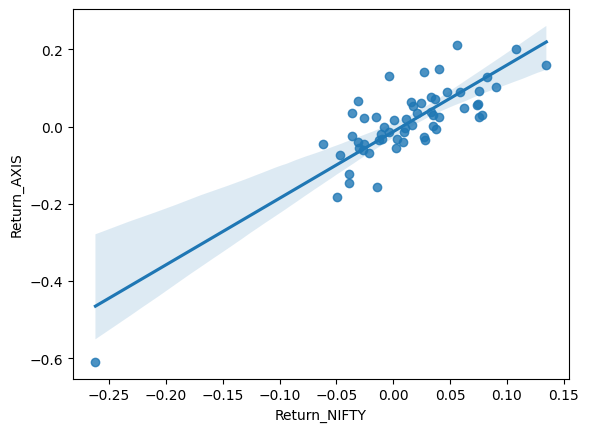

In [166]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_AXIS', data = returns)

In [167]:
print('resid', results.resid)

resid Date
2019-02-01    0.013192
2019-03-01   -0.025908
2019-04-01   -0.016474
2019-05-01    0.035647
2019-06-01    0.027179
2019-07-01   -0.083006
2019-08-01    0.005765
2019-09-01   -0.016399
2019-10-01    0.021178
2019-11-01   -0.011767
2019-12-01    0.013739
2020-01-01    0.001814
2020-02-01    0.074065
2020-03-01   -0.144500
2020-04-01   -0.059219
2020-05-01   -0.064298
2020-06-01   -0.060005
2020-07-01   -0.055545
2020-08-01    0.107153
2020-09-01   -0.118676
2020-10-01    0.092450
2020-11-01    0.025948
2020-12-01   -0.091556
2021-01-01    0.132903
2021-02-01    0.000337
2021-03-01   -0.039859
2021-04-01    0.063161
2021-05-01   -0.046365
2021-06-01   -0.008298
2021-07-01   -0.044583
2021-08-01   -0.038911
2021-09-01   -0.059329
2021-10-01   -0.024886
2021-11-01   -0.044287
2021-12-01    0.011671
2022-01-01    0.150427
2022-02-01    0.025850
2022-03-01   -0.031920
2022-04-01    0.014228
2022-05-01   -0.002685
2022-06-01    0.020662
2022-07-01    0.000170
2022-08-01   -0.007281


<ipython-input-168-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


,0
count,5.900000e+01
mean,-9.879103e-18
std,6.127050e-02
min,-1.444997e-01
25%,-4.443502e-02
50%,1.695318e-04
75%,2.808111e-02
max,1.504273e-01


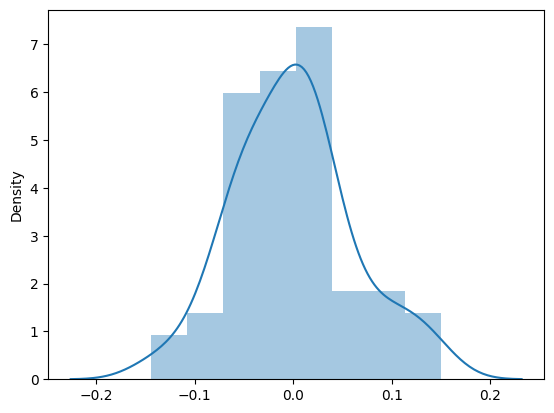

In [168]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [169]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(11.143165369625095), 'Test Statistic p-value': np.float64(0.0038044544129855994), 'F-Statistic': np.float64(6.519625310769505), 'F-Test p-value': np.float64(0.0028482285252358287)}


# The errors are homoskedastic as per the White test

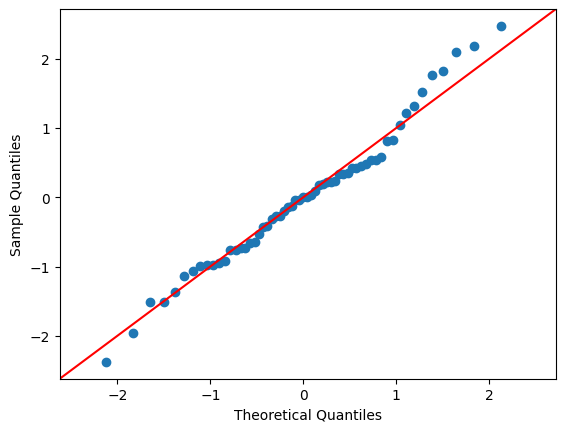

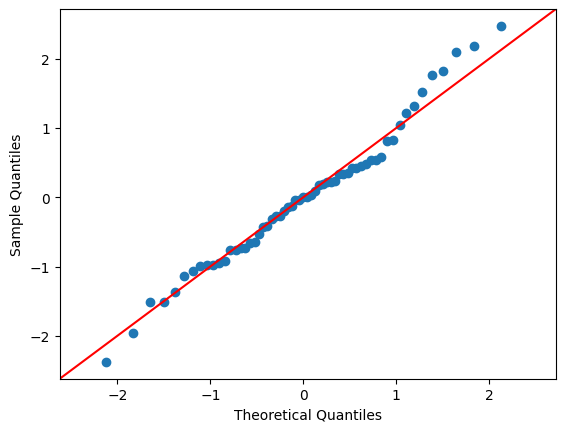

In [170]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [171]:
stats.normaltest(results.resid)

NormaltestResult(statistic=np.float64(1.3427286121608275), pvalue=np.float64(0.5110109266755078))

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line. The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.

In [172]:
avg_monthly_return = nifty_df['Return_NIFTY'].mean()
annualized_market_return = (1 + avg_monthly_return) ** 12 - 1

annualized historical market return is often used as a proxy for the expected market return in CAPM

In [173]:
expected_market_return = annualized_market_return

In [174]:
risk_free_rate = 0.0647

cost_of_equity = risk_free_rate + beta * (expected_market_return - risk_free_rate)
print(f"\nCost of Equity (using CAPM): {cost_of_equity:.4f} or {cost_of_equity*100:.2f}%")


Cost of Equity (using CAPM): 0.2104 or 21.04%


We calculated the cost of equity capital using CAPM model which came out to be 15.97%